In [1]:
from helpers import * 
from processor import *

ic| cut_vertices: [7, 0]


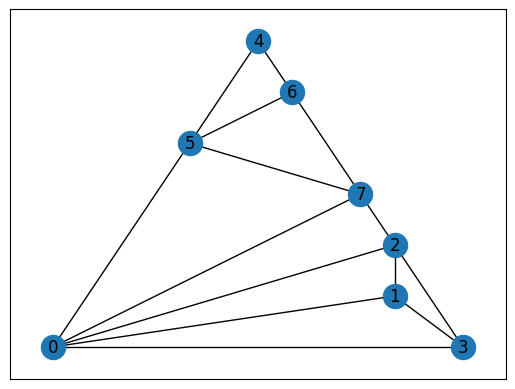

In [2]:
G_st = st_graph()   
p = Processor(G_st)
p.augment()
pos = plot_planar(p.G, p.embed)

ic| tri.target_edge: (2, 3)
ic| 'neither same'
ic| len(l3_cycles): 8, m: 16, n: 9, m - n + 1: 8


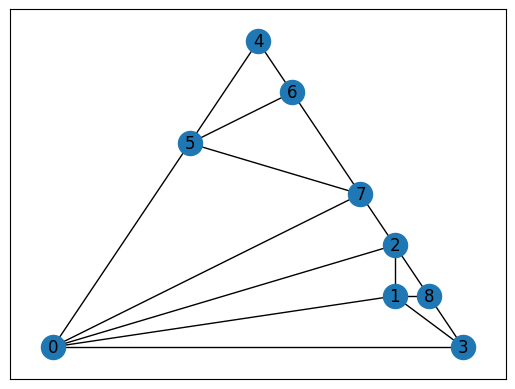

In [3]:
p.fix_separating_triangles()
plot_planar(p.G, p.s.embed)

In [4]:
p.fix_cips()

In [5]:
p.add_corner_nodes()

ic| 'Passes planarity check'


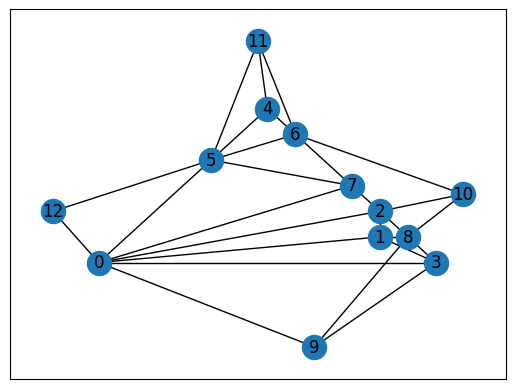

In [6]:
plot_planar(p.b.G, p.b.embed)

In [7]:
from shapely import LineString, LinearRing, MultiLineString

In [10]:
N= [v.node for v in p.b.corner_node_data.values()]

subgraph_nodes = [node for node in N if node in p.b.G.nodes()]
subgraph_edges = [(u, v) for (u, v) in p.b.G.edges() if u in N or v in N]
subgraph_edges
# subgraph = p.b.G.subgraph(subgraph_nodes)
# subgraph.add_edges_from(subgraph_edges)

[(0, 9),
 (0, 12),
 (2, 10),
 (3, 9),
 (4, 11),
 (5, 11),
 (5, 12),
 (6, 10),
 (6, 11),
 (8, 9),
 (8, 10)]

In [12]:
shapely_edges = []
# for e in subgraph_edges:
for e in p.b.G.edges:
    start, end = e
    shapely_edges.append(LineString([p.b.embed[start], p.b.embed[end]]))
len(shapely_edges)

27

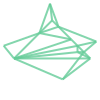

In [13]:
MultiLineString(shapely_edges)

In [14]:
for ik, k in enumerate(shapely_edges):
    for ij, j in enumerate(shapely_edges):
            if k.crosses(j) and ik != ij:
                print(ik, ij)
    # need to distinguish if interescting is happening at corners.. 

1 25
8 25
25 1
25 8
